<a href="https://colab.research.google.com/github/ptmdmusique/cs510-data-with-python/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Da Music

## Description

- Analyze and learn about music created over the years
- Predict next year trend

## Target questions

* What's the distribution of different genre and other interesting columns?
* Is there a correlation between tempo and popularity of a song?
* Do the most repeated songs fall into a specific mood cluster (grouped by valence)?
* How do moods differ between genres (e.g.: rap vs classical)?
* What's the popularity over the year (e.g.: based on genre)?
* Is there a correlation between popularity and play count?


## Data fetching

Fetch data from Hugging Face. The sources are inside the cell itself.
There are 2 dataset that will be used for this project
* Detail song dataset - [link](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset) - contains information such as the liveliness, popularity, etc of the songs
* Song metadata dataset - [link](https://huggingface.co/datasets/bigdata-pw/Spotify) - contains songs' metadata such as published year

However, to avoid rate limiting, the data loaded from a local csv and a zip folder instead

In [1]:
import pandas as pd
import dask.dataframe as dd
!pip install -q gdown
import gdown
import ast
import matplotlib.pyplot as plt
import seaborn as sns
!pip install circlify
import circlify
import numpy as np
!pip install pycountry
import pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.0 MB/s eta 0:00:00


In [ ]:
# Load from dataset
# main_df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

# Load locally
gdown.download("https://drive.google.com/uc?id=17of8pv_Al00Er66cewY57NAu9BSDIvHy", "main_data.csv", quiet=False)
main_df = pd.read_csv("main_data.csv")
main_df.head()

Downloading...
From: https://drive.google.com/uc?id=17of8pv_Al00Er66cewY57NAu9BSDIvHy
To: /content/main_data.csv
100%|██████████| 20.1M/20.1M [00:00<00:00, 31.7MB/s]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Load from dataset
# metadata_df = dd.read_parquet("hf://datasets/bigdata-pw/Spotify/**/*.parquet")

# Load locally
gdown.download("https://drive.google.com/uc?id=1zOK8dgeKFkAOB1XfvPHQXIumJHQ-Mwxg", "metadata.zip", quiet=False)
!unzip metadata.zip -d metadata
metadata_df = dd.read_csv("metadata/metadata/metadata_*.csv")

metadata_df.head()

,album_name,album_uri,album_date,artists,content_rating,duration,language,name,playcount,popularity,uri
0,Glazunov: Symphony No. 1 & Violin Concerto,6UuhdubAi7oWtZe8uK2hwP,"{'day': 1.0, 'month': 9.0, 'year': 1999.0}",[{'artist_gid': 'ea7c8f0f20304977805a2a06d305b...,NONE,677440.0,['zxx'],"Violin Concerto in A Minor, Op. 82: II. Andante",0.0,1.0,00qxNz44liU0GuNvU6jK3S
1,Mississippi,1F0vVZSBGEwQCQLpMNAoX8,"{'day': 11.0, 'month': 8.0, 'year': 2023.0}",[{'artist_gid': 'ea8667fa63fd40919571ff6702463...,NONE,184514.0,['en'],Whistle,18327.0,17.0,7tMBIFLRHcwiwFSqTGr4nm
2,From Our Heart,5WRdAyymmUO5HTsXVd7Ki9,"{'day': 11.0, 'month': 8.0, 'year': 1988.0}",[{'artist_gid': 'ff2ec8aa0d6c461bb97aadf34655f...,NONE,177476.0,['en'],Jerusalem Coming Down,0.0,0.0,1Y126hnIT64R1nbqRiHGjY
3,Thunder Meditation,2N37AZizDFyq8uT1HqpIbt,"{'day': 23.0, 'month': 11.0, 'year': 2018.0}",[{'artist_gid': '5bb72b6b447d4ac9a61aaa3f42e47...,NONE,226559.0,['zxx'],Finnish Rain,5482033.0,22.0,3XjsUzQH4y0EL7PhMSnlSs
4,Marathia,3AjVuMTqsXGR7vXNo9OwSu,"{'day': 28.0, 'month': 10.0, 'year': 2022.0}",[{'artist_gid': 'a7492507f9cc49b2b470c33c51bad...,NONE,133810.0,['zxx'],Marathia,2808098.0,33.0,6Vcmffnur4CAIFaV0Z1VHv


## Data Cleaning

As we're analyzing the song trend over the years, we need to have the year column appended to the main dataset
The goal of this section is to
* Filter out only the rows of the main dataset that has the full data in the metadata dataset
* Drop any nonsense column
* Do statistical analysis to remove outliers (e.g.: song that were published too early)

### Get only the rows that has metadata

In [ ]:
uri_df = metadata_df[['uri']].compute()
uri_set = set(uri_df['uri'].dropna()) # Shove into a set for super duper fast lookup

rows_with_full_data_mask = main_df['track_id'].isin(uri_set)
filtered_main_df = main_df[rows_with_full_data_mask]

print("Main shape", main_df.shape)
print("Filtered shape", filtered_main_df.shape)

filtered_main_df.to_csv("filtered_tracks.csv", index=False)

Main shape (114000, 21)
Filtered shape (70733, 21)


### Join the metadata with the main data

In [ ]:
track_ids = set(filtered_main_df['track_id'].dropna())
track_id_mask = metadata_df['uri'].isin(track_ids)

# The original data has too many data that we'll not used
# So filter by only the valid entries to speed up the process, urg 🏃‍♀️
filtered_metadata_df = metadata_df[track_id_mask][['uri', 'album_date', 'language', 'playcount']]

# We don't really care about the other columns as they don't contain useful values or we already have it in the main df
metadata_subset = filtered_metadata_df.compute()

merged_df = filtered_main_df.merge(
    metadata_subset,
    left_on='track_id',
    right_on='uri',
    how='inner'
).drop(columns=['uri']) # Also drop the dup column

In [2]:
## Or just load the pre-computed file
gdown.download("https://drive.google.com/uc?id=1WXbU9DvBwcTiRntsZbkA9tPPpCNSq4uF", "merged_data.csv", quiet=False)
merged_df = pd.read_csv("merged_data.csv")

Downloading...
From: https://drive.google.com/uc?id=1WXbU9DvBwcTiRntsZbkA9tPPpCNSq4uF
To: /content/merged_data.csv
100%|██████████| 17.6M/17.6M [00:00<00:00, 85.6MB/s]


In [3]:
# merged_df.to_csv("merged_data.csv", index=False)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70733 entries, 0 to 70732
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        70733 non-null  int64  
 1   track_id          70733 non-null  object 
 2   artists           70733 non-null  object 
 3   album_name        70733 non-null  object 
 4   track_name        70733 non-null  object 
 5   popularity        70733 non-null  int64  
 6   duration_ms       70733 non-null  int64  
 7   explicit          70733 non-null  bool   
 8   danceability      70733 non-null  float64
 9   energy            70733 non-null  float64
 10  key               70733 non-null  int64  
 11  loudness          70733 non-null  float64
 12  mode              70733 non-null  int64  
 13  speechiness       70733 non-null  float64
 14  acousticness      70733 non-null  float64
 15  instrumentalness  70733 non-null  float64
 16  liveness          70733 non-null  float6

### Drop nonsense columns

In [4]:
column_to_drop = ['Unnamed: 0']
merged_df.drop(columns=column_to_drop, inplace=True, errors='ignore')

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70733 entries, 0 to 70732
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          70733 non-null  object 
 1   artists           70733 non-null  object 
 2   album_name        70733 non-null  object 
 3   track_name        70733 non-null  object 
 4   popularity        70733 non-null  int64  
 5   duration_ms       70733 non-null  int64  
 6   explicit          70733 non-null  bool   
 7   danceability      70733 non-null  float64
 8   energy            70733 non-null  float64
 9   key               70733 non-null  int64  
 10  loudness          70733 non-null  float64
 11  mode              70733 non-null  int64  
 12  speechiness       70733 non-null  float64
 13  acousticness      70733 non-null  float64
 14  instrumentalness  70733 non-null  float64
 15  liveness          70733 non-null  float64
 16  valence           70733 non-null  float6

## Data transformation

### Published year extraction

Extract the year information from the published date

The `album_date` is actually a string column representing jsons. So we'll first need to convert that into an actual json column first

An example value
```json
  {
    "day": 1,
    "month": 9,
    "year": 1999
  }
```

There are some NA rows, but we still want to keep them. So what I'm trying to do here is to just convert the empty values to `unknown`

In [6]:
def safe_parse(val):
    try:
        if pd.isna(val):
          return {}
        return ast.literal_eval(val)
    except (ValueError, SyntaxError, TypeError):
        return {}

def extract_year_from_dict(date_dict):
    try:
        year = date_dict.get('year', None)
        if year is None or pd.isna(year):
            return 'unknown'
        return int(year)
    except:
        return 'unknown'

In [7]:
album_date_json_df = merged_df['album_date'].apply(safe_parse)
merged_df['album_year'] = album_date_json_df.apply(extract_year_from_dict)

Just for fun, let's view the distribution!

In [8]:
merged_df["album_year"].value_counts()

,count
album_year,
unknown,15257
2022,7978
2021,6352
2020,4663
2019,4018
...,...
1952,5
1950,5
1951,4


album_year
2022    7978
2021    6352
2020    4663
2019    4018
2018    3321
Name: count, dtype: int64


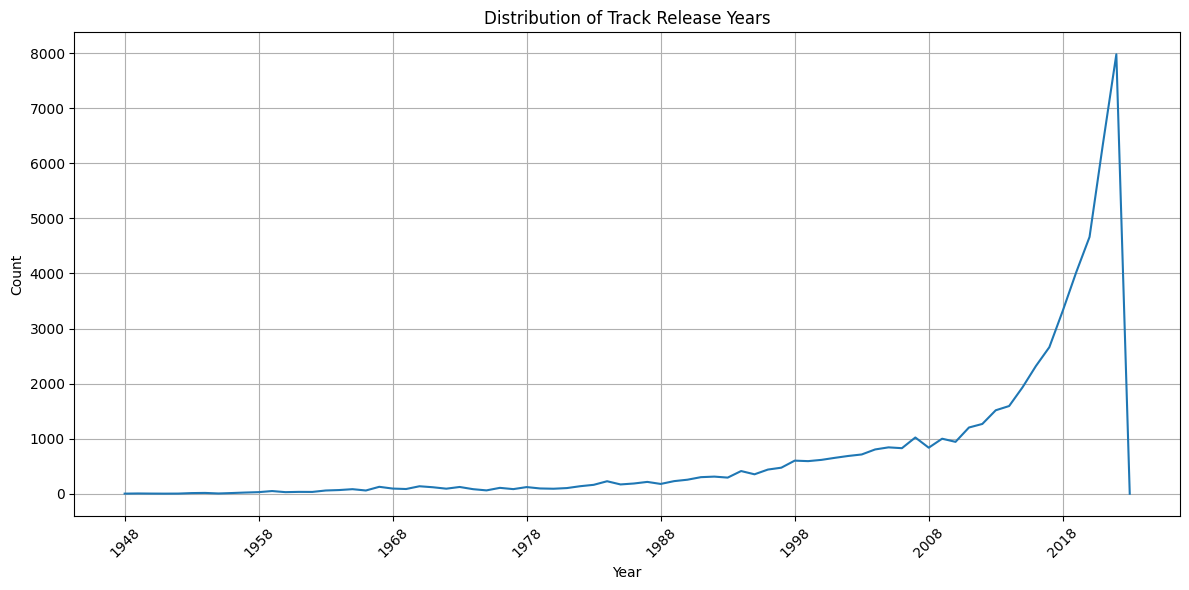

In [9]:
no_unknown_year_mask = merged_df['album_year'] != 'unknown'
by_year_count_df = merged_df['album_year'][no_unknown_year_mask].value_counts()
print(by_year_count_df.head())
by_year_count_df.sort_index().plot(
    kind='line',
    figsize=(12, 6),
    title='Distribution of Track Release Years'
)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Seems like 2022 has the most rows and 2023 almost has none. This makes sense because the dataset was created around 2 years ago.

Looking at the chart right now, it seems like the bins are heavily skewed toward 2022. This means if we analyze the data based on the published year, the result will be biased.

However, for the sake of the assignment, let's assume that the data are evenly distributed, especially for the modeling step

### Transform `valence`

Group data into human-readable sentiment categories based on `valence` column and an arbitrary heuristic criteria

As mentioned in the description, `valence` is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

First, let's analyze the column to see how we can effectively divide the columns into bins

In [10]:
def draw_valence_distribution():
  plt.figure(figsize=(10, 6))
  plt.hist(merged_df['valence'].dropna(), bins=30, color='skyblue', edgecolor='black')
  plt.title('Distribution of Valence')
  plt.xlabel('Valence (0 = sad, 1 = happy)')
  plt.ylabel('Number of Tracks')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

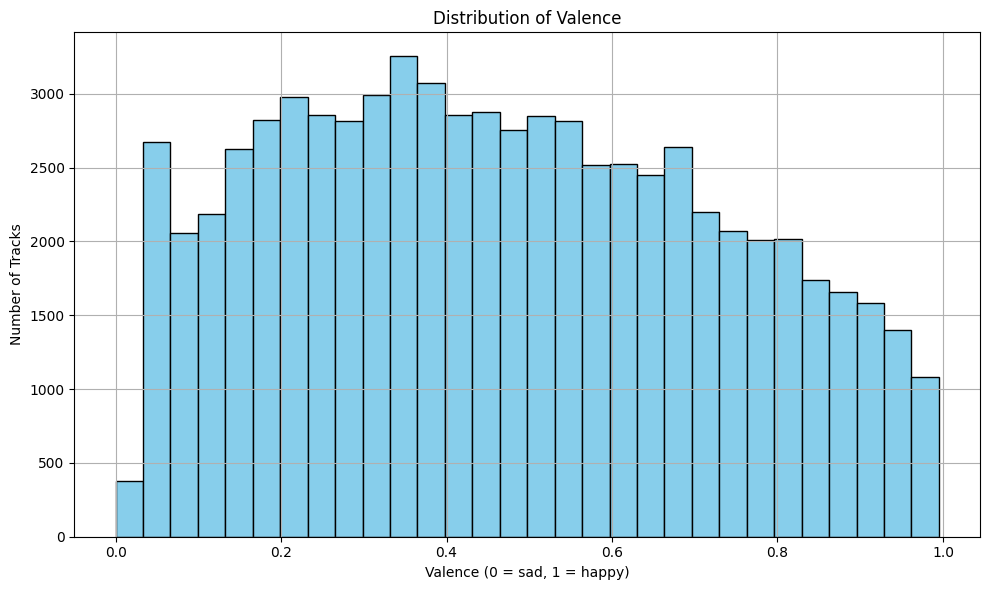

In [11]:
draw_valence_distribution()

With the exception of the first bin, generally the valence values are evenly distributed. Because of that, we can safely categorize this into 3 categories without worrying being biased

- `sad` for `0 < valence < 0.33`
- `neutral` for `0.33 <= valence < 0.66`
- `happy` for `0.66 <= valence < 1`

In [12]:
def categorize_valence(v):
    if pd.isna(v):
        return 'unknown'
    if v < 0.33:
        return 'sad'
    elif v < 0.66:
        return 'neutral'
    else:
        return 'happy'

merged_df['valence_category'] = merged_df['valence'].apply(categorize_valence)

Let's view the distribution of the categories

In [60]:
def draw_valence_category_distribution():
  valence_count_df = merged_df['valence_category'].value_counts().reset_index()
  display(valence_count_df)
  print("\n\n")

  x = valence_count_df["valence_category"]
  y = valence_count_df["count"]

  plt.figure(figsize=(8,4))
  plt.bar(x, y)

  plt.xlabel('Valence Category')
  plt.ylabel('Number of Tracks')
  plt.tight_layout()
  plt.show()

,valence_category,count
0,neutral,27812
1,sad,24194
2,happy,18727


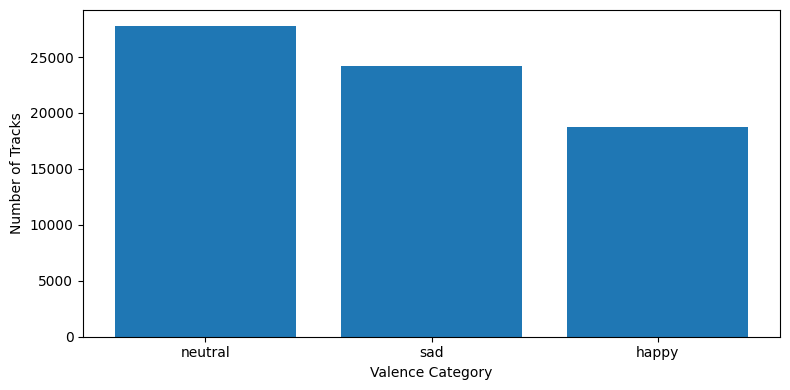

In [61]:
draw_valence_category_distribution()

Seems like we can... somewhat have a conclusion here, but let's not get ahead of ourselves 🤫

### Transform `language`

The language column is in an array of string, e.g.: ["en"]. The target of this section is to  just take the single value and transform it into readable values

In [15]:
def get_language_name(lang_code_str: str):
    try:
        # Safely evaluate the string representation of the list
        lang_list = ast.literal_eval(lang_code_str)
        if isinstance(lang_list, list) and len(lang_list) > 0:
            lang_code = lang_list[0]
            # Use pycountry to get the language name
            lang = pycountry.languages.get(alpha_2=lang_code)
            if lang:
                return lang.name
            else:
                return lang_code
        else:
            return lang_code
    except (ValueError, SyntaxError, TypeError):
        return 'unknown'

print("Raw language code")
display(merged_df['language'].value_counts())

merged_df['language_name'] = merged_df['language'].apply(get_language_name)
print("\nTransformed and readable language name")
display(merged_df['language_name'].value_counts())

print("\nSongs without language content (code: zxx)")
no_content_mask = merged_df['language_name'] == 'zxx'
no_content_df = merged_df[no_content_mask]
display(no_content_df.head())

print("\nWe'll explore this more later")

Raw language code


,count
language,
['en'],28178
['zxx'],7226
['pt'],5055
['es'],3923
['ja'],2444
...,...
['hbs'],1
['sm'],1
['ki'],1



Transformed and readable language name


,count
language_name,
English,28178
unknown,16872
zxx,7226
Portuguese,5055
Spanish,3923
...,...
hbs,1
Samoan,1
Kikuyu,1



Songs without language content (code: zxx)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,tempo,time_signature,track_genre,uri,album_date,language,playcount,album_year,valence_category,language_name
102,5RO0MNa5hBKIM4OcjygadU,Joseph Sullinger,Chi Mai,Chi Mai,40,188695,False,0.739,0.287,6,...,80.640,4,acoustic,5RO0MNa5hBKIM4OcjygadU,"{'day': 29.0, 'month': 7.0, 'year': 2022.0}",['zxx'],654821.0,2022,neutral,zxx
111,7Ca2CkwSqHyr3eCh8IRdjz,Agustín Amigó;Nylonwings,Mujer con Abanico,Mujer con Abanico,41,156787,False,0.769,0.135,5,...,103.939,4,acoustic,7Ca2CkwSqHyr3eCh8IRdjz,"{'day': 16.0, 'month': 9.0, 'year': 2022.0}",['zxx'],522116.0,2022,neutral,zxx
307,2JI53ZVCxMucM68UpCtZ5C,Wayne Mack,Fake a smile,Fake a smile,57,169600,False,0.731,0.191,0,...,149.910,4,acoustic,2JI53ZVCxMucM68UpCtZ5C,"{'day': 20.0, 'month': 4.0, 'year': 2021.0}",['zxx'],7485388.0,2021,sad,zxx
309,0Bv0qHGKNiwzDtHzXrjmIn,Sungha Jung,Irony,River Flows In You,42,214466,False,0.356,0.230,6,...,129.532,4,acoustic,0Bv0qHGKNiwzDtHzXrjmIn,"{'day': 21.0, 'month': 9.0, 'year': 2011.0}",['zxx'],7625227.0,2011,sad,zxx
487,3YalaPTUkyCYanwIf0l4UN,Eddie Vedder,Into The Wild (Music For The Motion Picture),Toulumne,51,60306,False,0.337,0.287,0,...,107.031,4,acoustic,3YalaPTUkyCYanwIf0l4UN,"{'day': 18.0, 'month': 9.0, 'year': 2007.0}",['zxx'],31366268.0,2007,neutral,zxx



We'll explore this more later


## Data analysis and visualization

This section aims to answer these questions as mentioned in the top section

* What's the distribution of different genre and other interesting columns?
* Is there a correlation between popularity and other columns: play count, tempo?
* Do the most repeated songs fall into a specific mood cluster (grouped by valence)?
* How do moods differ between genres (e.g.: rap vs classical)?
* What's the popularity over the year (e.g.: based on genre)?

Let's first look at what columns we currently have. For the definition of each column, we can refer back to [this](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70733 entries, 0 to 70732
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          70733 non-null  object 
 1   artists           70733 non-null  object 
 2   album_name        70733 non-null  object 
 3   track_name        70733 non-null  object 
 4   popularity        70733 non-null  int64  
 5   duration_ms       70733 non-null  int64  
 6   explicit          70733 non-null  bool   
 7   danceability      70733 non-null  float64
 8   energy            70733 non-null  float64
 9   key               70733 non-null  int64  
 10  loudness          70733 non-null  float64
 11  mode              70733 non-null  int64  
 12  speechiness       70733 non-null  float64
 13  acousticness      70733 non-null  float64
 14  instrumentalness  70733 non-null  float64
 15  liveness          70733 non-null  float64
 16  valence           70733 non-null  float6

### Q1. Distribution of different language, genre, energy, and valence

We'll first explore the cultural diversity of the dataset through some preliminary visualizations through some key features that shape the character of each track. Later on, we'll use this metadata to predict listening trends and product patterns.

We'll first define some helpers to draw the graphs as these will be repeated across the attributes

In [62]:
def get_random_color():
  return list(np.random.random(size=3))

# Just generate a prefilled list of colors for graph consistency
prefilled_colors = [get_random_color() for _ in range(1000)]

In [72]:
MAX_RADIUS = 0.5
BASE_FONT_SIZE = 60
MIN_FONT_SIZE = 7

# Get the interpolated fontsize based on the radius
def get_fontsize_based_on_radius(radius: int):
  return max((radius / MAX_RADIUS) * BASE_FONT_SIZE, MIN_FONT_SIZE)

# Generate the label for our entries with the count taken into account
def append_count_to_label(label: str, count: int):
    return f"{label} ({count})"

# Draw a bubble graph representation of the dataframe - DF is required to have a "count" and "label" column
def draw_bubble_graph(df: pd.DataFrame, title: str):
    # Create a list of circles and makes sure they have equal distance apart
    circles = circlify.circlify(
        df['count'].tolist(),
        # plt will only show 1 quadrant so we need to shift everything to the middle
        # and ensure the biggest circle won't expand more than the boundary (aka r=0.5)
        target_enclosure=circlify.Circle(x=0.5, y=0.5, r=MAX_RADIUS)
    )

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    ax.set_aspect('equal')

    for index, (circle, row) in enumerate(zip(circles, df.sort_values(by="count").itertuples())):
        x, y, r = circle.x, circle.y, circle.r
        ax.add_patch(plt.Circle((x, y), r, alpha=0.6, color=prefilled_colors[index]))
        ax.text(x, y, row.label, ha='center', va='center', fontsize=get_fontsize_based_on_radius(r))

    plt.title(title, fontsize=14)
    plt.show()

'''
  Draw a bubble graph representation of the dataframe - DF is required to have a "count" and "label" column
  Pass in the `rest_threshhold` to group all the minority into the `rest` group to avoid noisy graph
'''
def group_and_draw_bubble_graph(df: pd.DataFrame,
                                title: str, group_column_name: str, x_label: str,
                                rest_threshhold: int = 500, draw_bar = True):
  grouped_raw = df[group_column_name].value_counts().sort_values()
  grouped_raw = grouped_raw.reset_index()
  grouped_raw['label'] = grouped_raw.apply(lambda row: append_count_to_label(row[group_column_name], row['count']), axis=1)

  # Separate large and small groups
  major = grouped_raw[grouped_raw['count'] >= rest_threshhold]
  minor = grouped_raw[grouped_raw['count'] < rest_threshhold]

  # Create a new row for "the rest"
  the_rest_count = minor['count'].sum()
  rest_row = pd.DataFrame([{
      'label': append_count_to_label('The Rest', the_rest_count),
      'count': the_rest_count
  }])

  grouped = pd.concat([major, rest_row], ignore_index=True)

  draw_bubble_graph(grouped, title)

  if draw_bar:
    print("\n\n")
    x = grouped["label"]
    y = grouped["count"]

    plt.figure(figsize=(8,4))

    plt.bar(x, y)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    plt.show()

#### Language distribution

Let's first take a look at the language

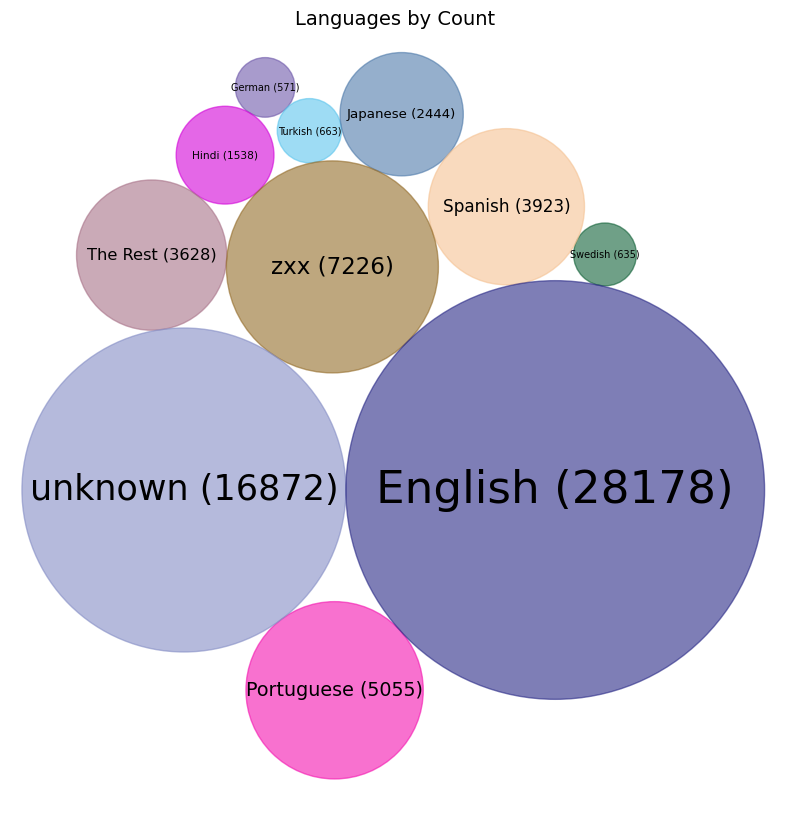

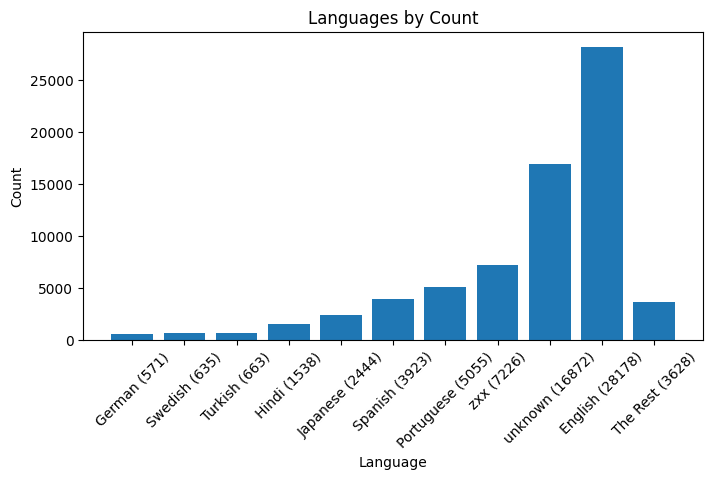

In [73]:
group_and_draw_bubble_graph(df=merged_df, title="Languages by Count", group_column_name="language_name", x_label="Language")

The dataset seems to lean toward heavily to English. However, there are a lot of songs without language data. This is different from song without words where the language code is `zxx`

#### Genre distribution

Let's next look at genre next

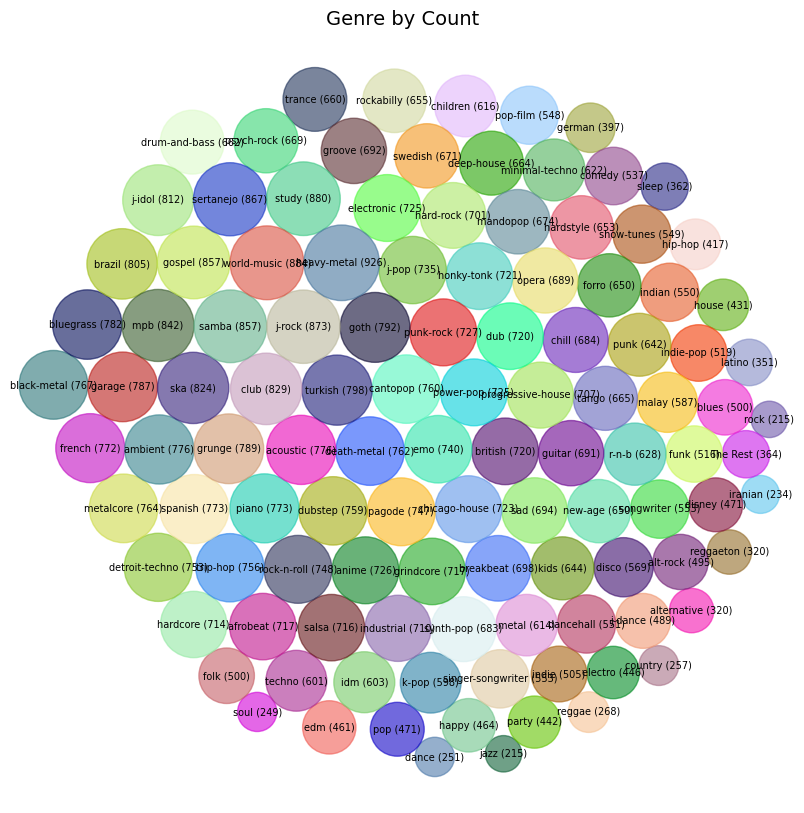

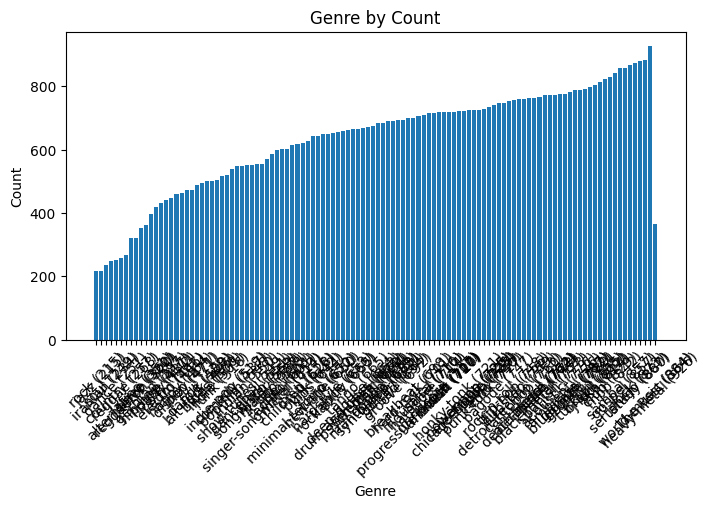

In [74]:
genre_key="track_genre"
group_and_draw_bubble_graph(df=merged_df, title="Genre by Count", group_column_name=genre_key, x_label="Genre", rest_threshhold=200)

Well... that's certainly isn't helpful at all. At first glance, it seems like the genres are well distributed, however, the bar graph proves otherwise. Let's look at some value count

In [69]:
merged_df[genre_key].value_counts()

,count
track_genre,
heavy-metal,926
world-music,884
study,880
j-rock,873
sertanejo,867
...,...
rock,215
jazz,215
classical,141


#### Energy distribution

`energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [81]:
def draw_histogram(df: pd.DataFrame, title: str, x_label: str, y_label: str):
  plt.figure(figsize=(5, 5))
  plt.hist(df, bins=30, color='skyblue', edgecolor='black')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

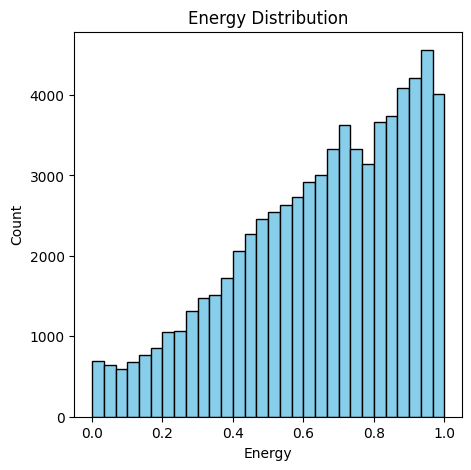

In [82]:
draw_histogram(df=merged_df['energy'], title="Energy Distribution", x_label="Energy", y_label="Count")

#### Valance distribution

`valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

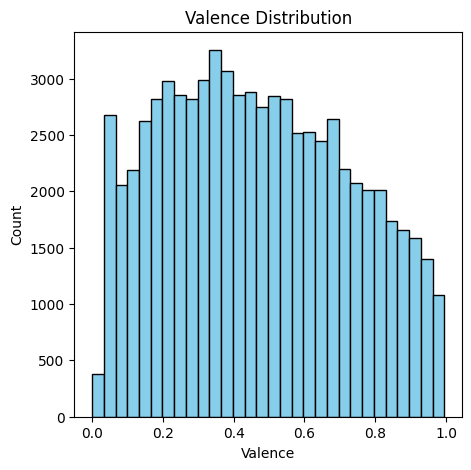

In [83]:
draw_histogram(df=merged_df['valence'], title="Valence Distribution", x_label="Valence", y_label="Count")

This lines up with the category grouping we saw earlier in the notebook

,valence_category,count
0,neutral,27812
1,sad,24194
2,happy,18727


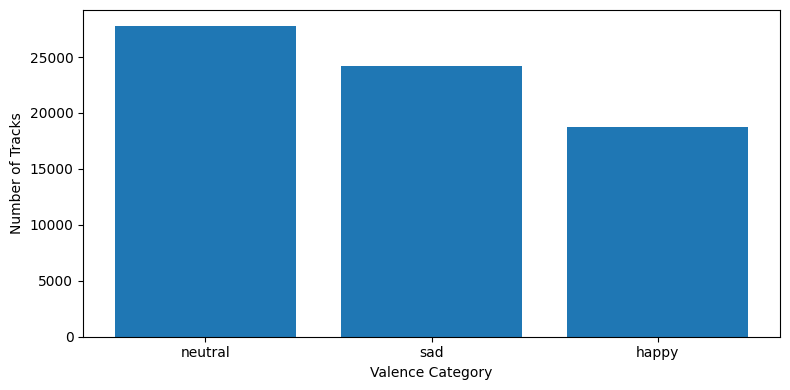

In [84]:
draw_valence_category_distribution()

### Q2. Popularity and other column correlations

We'll take a look at whether there is any correlation between the popularity columns and the play count as well as the tempo columns

As a reminder, we'll use the Pearson correlation matrix, where:
* `1.0` = perfect positive correlation
* `-1.0` = perfect negative correlation
* `0.0` = no linear correlation

In [95]:
correlation = merged_df[["tempo", "playcount", "popularity"]].corr()
display(correlation)

,tempo,playcount,popularity
tempo,1.000000,-0.022955,-0.023769
playcount,-0.022955,1.000000,0.499470
popularity,-0.023769,0.499470,1.000000


And in term of visualization

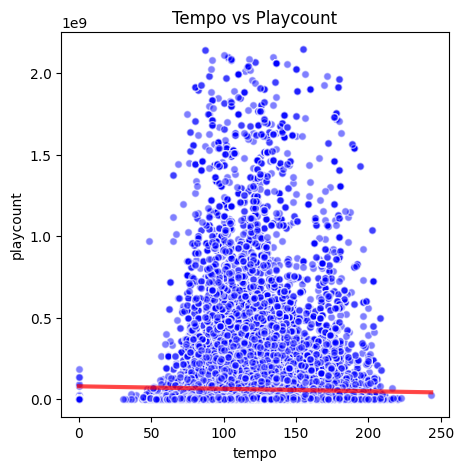

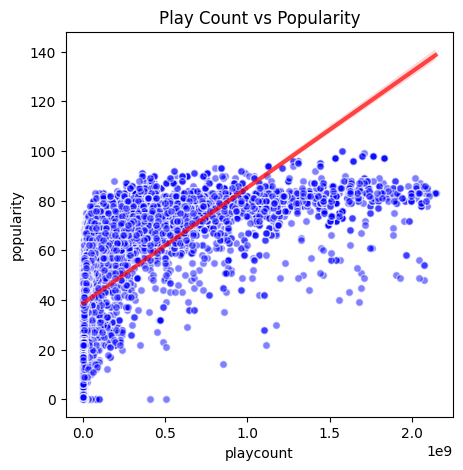

In [96]:
def draw_regplot(df: pd.DataFrame, x_col: str, y_col: str, title: str):
  plt.figure(figsize=(5, 5))
  sns.regplot(data=merged_df, x=x_col, y=y_col,
              scatter_kws={"alpha": 0.5, "s": 30, "color": 'blue', "edgecolors": 'white'},
              line_kws={"alpha": 0.7, "color": 'red', "linewidth": 3})
  plt.title(title)
  plt.show()

draw_regplot(merged_df, "tempo", "playcount", "Tempo vs Playcount")
draw_regplot(merged_df, "playcount", "popularity", "Play Count vs Popularity")
